## Import libraries here

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Read dataset here

In [5]:
df1 = pd.read_csv('dataset/data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

## Data Cleaning

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

#### Let's remove some columns which are not that useful to us.

In [8]:
df2 = df1.drop(['society', 'area_type', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Let's see how much with NaN values are there 

In [9]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

#### Remove those rows

In [10]:
df3 = df2.dropna()
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df3.shape

(12710, 6)

#### Let's check how many unique sizes are there

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

We can see, there are few sizes like `2 BHK` or `3 BHK` whereas there are others like `2 Bedroom` or `3 Bedroom`.

Let's make a column called **BHK** with just the number of rooms.

In [13]:
df3['BHK'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

<ipython-input-13-772db274f226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [14]:
df3.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


#### Let's see how many unique number of rooms are available there.

In [15]:
df3['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

We can clearly see, there are few large numbers in the array too.

Well, I don't think someone would have flats with 27 or 43 rooms.

Let's see what is the `total_sqft` associated with them.

In [16]:
df3[df3['BHK']>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


It is clearly visible that a 27-BHK flat is just 8000 sqft in area as well as a 43-BHK flat is even less in area i.e. just 2400 sqft. This is simply not possible. We shall remove them later.

#### Let's observe our `total_sqft` column now.

In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see that there are some that are in range. 

Let's convert all except those with range into float.

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


Let's convert the above ranges into the mean value of their ranges.

In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+(float(tokens[1])))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
balcony               0
price               186
BHK                   4
Name: 30, dtype: object

In [24]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
balcony             0
price            18.5
BHK                 1
Name: 410, dtype: object

## Feature Engineering

#### Let's find the price per sqft(in Rs.) in a new column.

In [25]:
df5 = df4.copy()
df5['price_per_sqft_in_rs'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft_in_rs
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [26]:
len(df5['location'].unique())

1265

#### Now observe the location column

In [27]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

Let's just put together all of the locations that have less than 10 flats available into one row called `Other`.

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

In [29]:
len(df5['location'].unique())

1254

In [30]:
df5['location'] = df5.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

238

In [31]:
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft_in_rs
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


## Outlier Removal

#### We will now remove those rows where `total_sqft/BHK` is less than a certain threshold, say `300`. These can be considered data errors or anomalies or outliers.

In [32]:
df5[df5['total_sqft']/df5['BHK']<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft_in_rs
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [33]:
df5.shape

(12710, 8)

In [34]:
df6 = df5[~(df5['total_sqft']/df5['BHK']<300)]
df6.shape

(12055, 8)

#### We can find anomalies in `price_per_sqft_in_rs` too. Let's observe

In [35]:
df6['price_per_sqft_in_rs'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft_in_rs, dtype: float64

We can see that the minimum value is Rs. 267 per sqft which is very less in relevance to city like Bengaluru.

We can also see that the maximum is Rs. 1,76,470 per sqft which may be possible for properties in a very prime area. 

But as we are going to build a generic model, it makes sense to remove these kinds of extreme cases.

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft_in_rs'])
        st = np.std(subdf['price_per_sqft_in_rs'])
        reduced_df = subdf[(subdf['price_per_sqft_in_rs']>(m-st)) & (subdf['price_per_sqft_in_rs']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [39]:
df7 = remove_pps_outliers(df6)
df7.shape

(9848, 8)

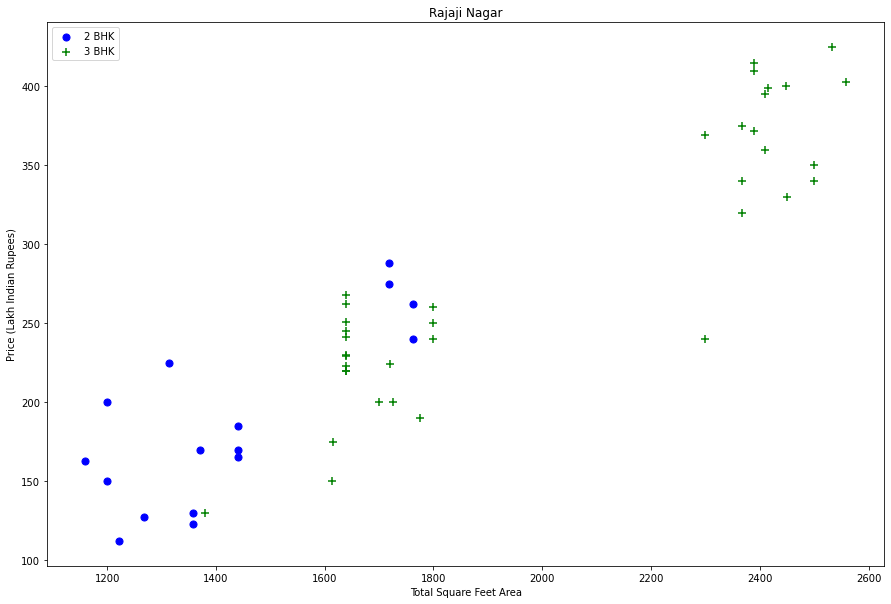

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['BHK'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['BHK'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

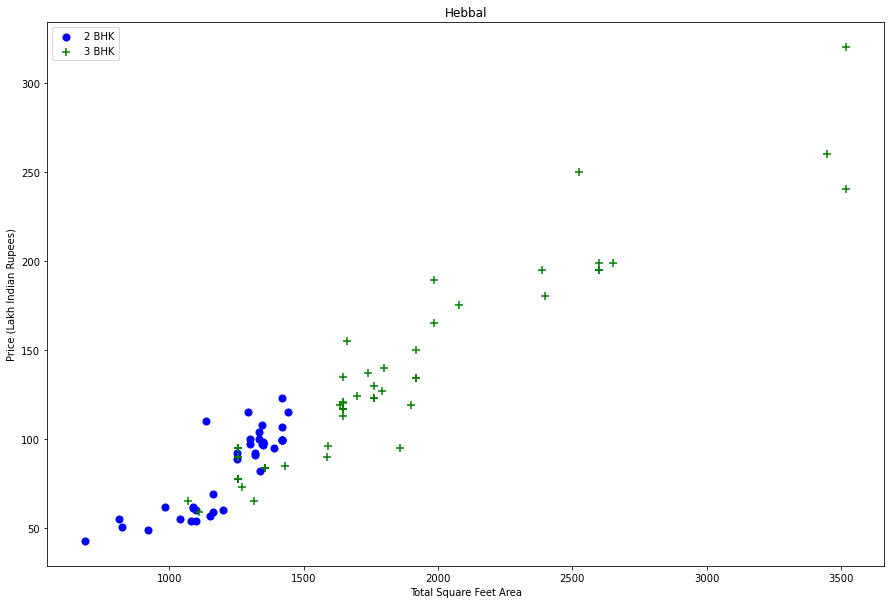

In [41]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
```json
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft_in_rs']),
                'std': np.std(bhk_df['price_per_sqft_in_rs']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft_in_rs']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [46]:
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7025, 8)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

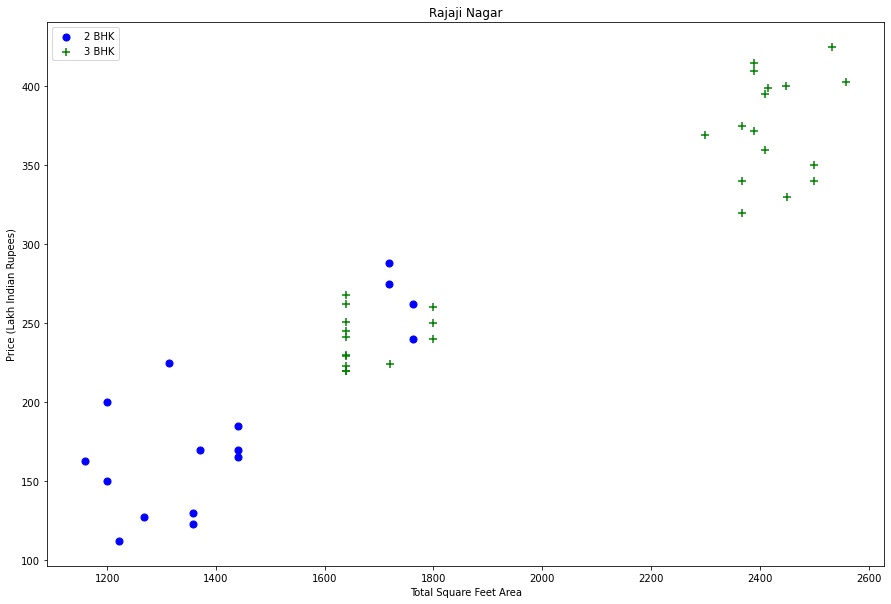

In [47]:
plot_scatter_chart(df8,"Rajaji Nagar")

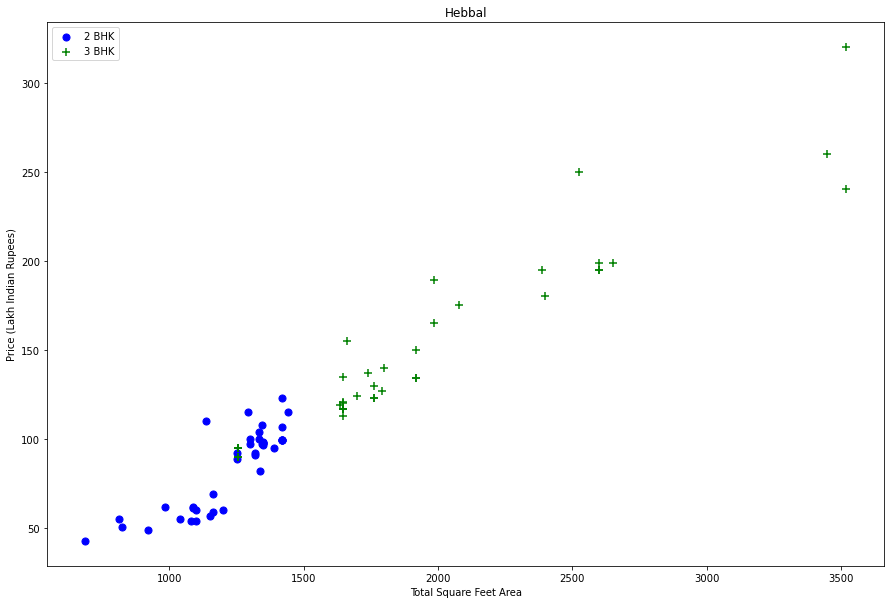

In [48]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

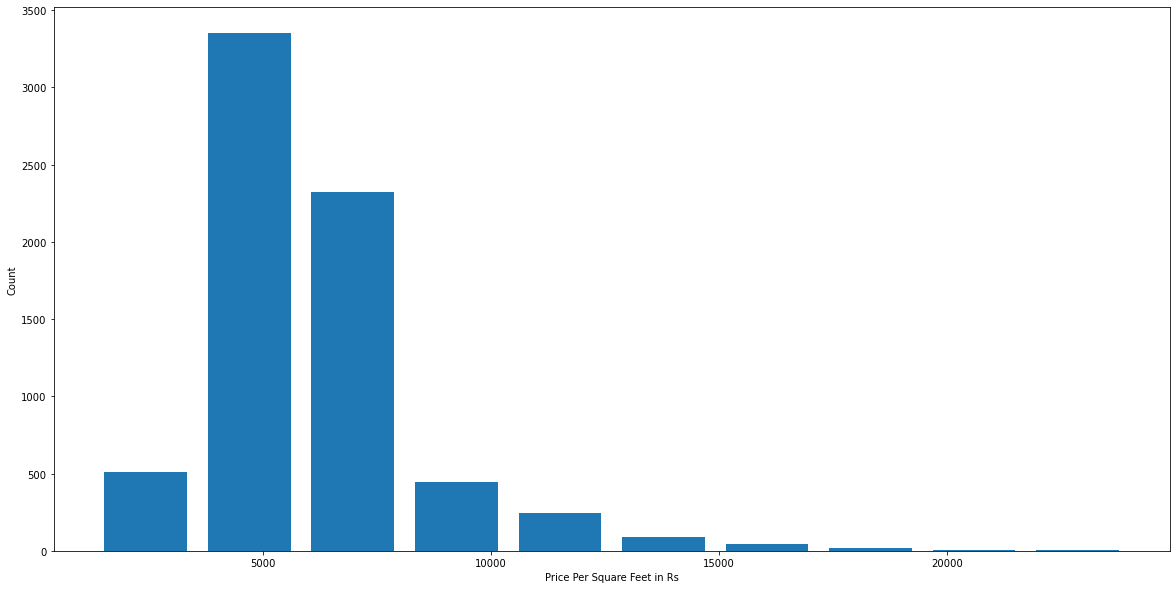

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8['price_per_sqft_in_rs'],rwidth=0.8)
plt.xlabel("Price Per Square Feet in Rs")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

In [50]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

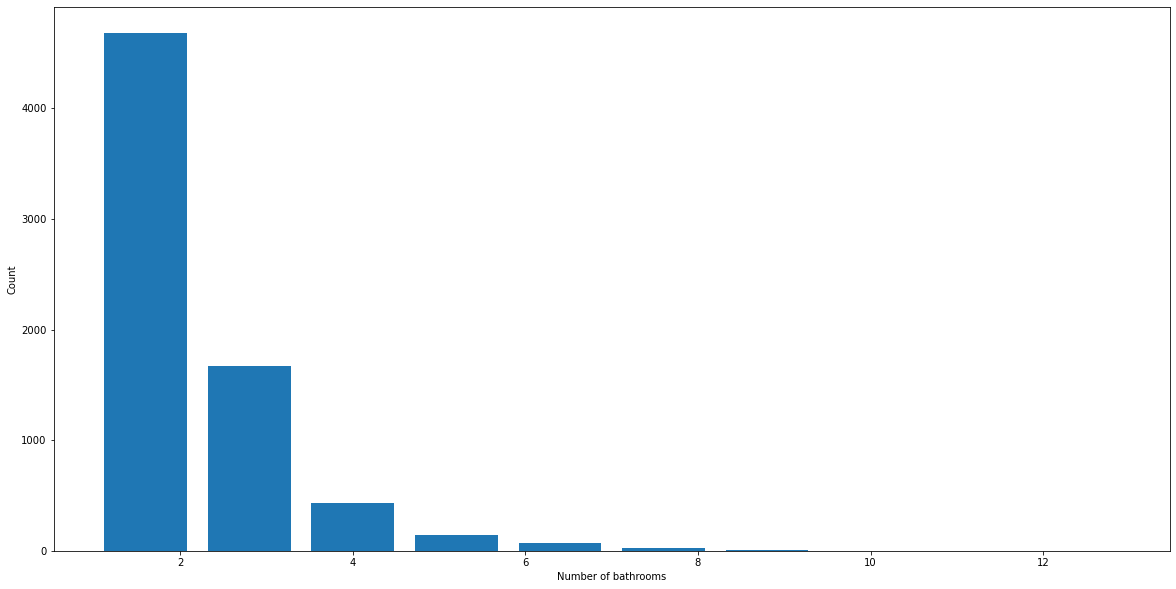

In [52]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [53]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft_in_rs
6761,Other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [55]:
df8[df8['bath']>df8['BHK']+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft_in_rs
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5583,Other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
8650,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


In [57]:
df9 = df8[df8['bath']<df8['BHK']+2]
df9.shape

(6958, 8)

In [59]:
df10 = df9.drop(['size','price_per_sqft_in_rs','balcony'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Use One Hot Encoding For Location

We know that machine learning model cannot interpret text data. We have one column `location` which contains text data. So, we have to convert it into numeric column using **One Hot Encoding**.

In [60]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df11 = pd.concat([df10,dummies.drop('Other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build a Model

In [64]:
df12.shape

(6958, 241)

X variable contains independent variables i.e. everything except `price`

In [69]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X.shape

(6958, 240)

y variable contains dependent variable i.e. `price`.

In [71]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [70]:
len(y)

6958

#### Now we split our dataset into training and test data set.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [74]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8552211453532985

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86493057, 0.83739448, 0.79159797, 0.88310436, 0.85376747])

#### We can see that in 5 iterations we get a score above 80% almost all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.846159,{'normalize': True}
1,lasso,0.697992,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.749119,"{'criterion': 'mse', 'splitter': 'random'}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [78]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [79]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

91.83969869949138

In [80]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

90.6887486487077

In [81]:
predict_price('Indira Nagar',1000, 2, 2)

165.50598995314638

In [82]:
predict_price('Indira Nagar',1000, 3, 3)

164.35503990236273

## Export the tested model to a pickle file

In [83]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [84]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))